In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,  accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

In [2]:
datagen_test_eval = ImageDataGenerator(rescale=1./255)
test_eval_generator = datagen_test_eval.flow_from_directory('./data/test_eval',target_size=(96, 96), class_mode='binary', batch_size=10, shuffle=False)

Found 22017 images belonging to 2 classes.


In [3]:
with tf.device('/cpu:0'):
    model = load_model('gs_dnn_ensemble_20221023T2328/models/1_v1.hdf5')
    X_test_eval = np.concatenate([test_eval_generator .next()[0] for i in range(test_eval_generator .__len__())])
    y_test_eval = np.concatenate([test_eval_generator .next()[1] for i in range(test_eval_generator .__len__())])

    preds = model.predict(X_test_eval, batch_size=10)

In [30]:
preds_labels = (preds > 0.51).astype(int)[:,0]

In [31]:
tn, fp, fn, tp = confusion_matrix(y_test_eval, preds_labels).ravel()
acc, prec, rec, fscore = accuracy_score(y_test_eval, preds_labels), precision_score(y_test_eval, preds_labels), recall_score(y_test_eval, preds_labels), f1_score(y_test_eval, preds_labels)

title = f'Classification results: \n TP: {tp}, TN: {tn}, FN: {fn}, FP: {fp} \n ACC: {acc:.5f}, PREC: {prec:.5f}, REC: {rec:.5f}, FSCORE: {fscore:.5f} \n'

In [32]:
print(title)

Classification results: 
 TP: 12436, TN: 7739, FN: 725, FP: 1117 
 ACC: 0.91634, PREC: 0.91758, REC: 0.94491, FSCORE: 0.93105 



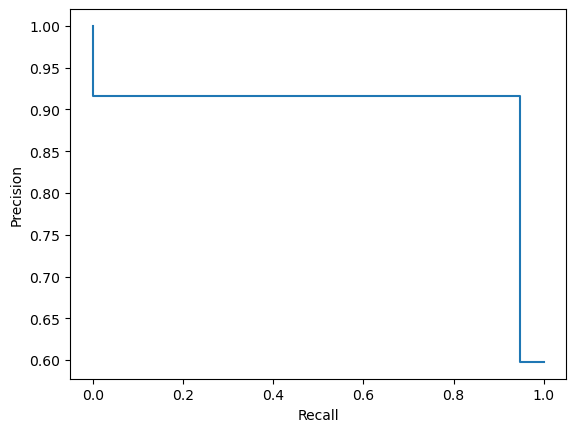

In [18]:
precision, recall, thresholds = precision_recall_curve(y_test_eval, preds_labels)
prd = PrecisionRecallDisplay(precision, recall)
prd.plot()

In [19]:
f1_scores = 2*recall*precision/(recall+precision)
print('Best threshold: ', thresholds[np.argmax(f1_scores)])
print('Best F1-Score: ', np.max(f1_scores))

Best threshold:  1
Best F1-Score:  0.9311813494732122


### Lopulliset ennustukset testidatalla

In [22]:
datagen_test_eval = ImageDataGenerator(rescale=1./255)
test_eval_generator = datagen_test_eval.flow_from_directory('./data/unseen',target_size=(96, 96), class_mode='binary', batch_size=10, shuffle=False)

Found 21717 images belonging to 2 classes.


In [23]:
with tf.device('/cpu:0'):
    model = load_model('gs_dnn_ensemble_20221023T2328/models/1_v1.hdf5')
    X_test_eval = np.concatenate([test_eval_generator .next()[0] for i in range(test_eval_generator .__len__())])
    y_test_eval = np.concatenate([test_eval_generator .next()[1] for i in range(test_eval_generator .__len__())])

    preds = model.predict(X_test_eval, batch_size=10)

In [24]:
preds_labels = (preds > 0.5).astype(int)[:,0]

In [25]:
tn, fp, fn, tp = confusion_matrix(y_test_eval, preds_labels).ravel()
acc, prec, rec, fscore = accuracy_score(y_test_eval, preds_labels), precision_score(y_test_eval, preds_labels), recall_score(y_test_eval, preds_labels), f1_score(y_test_eval, preds_labels)

title = f'Classification results: \n TP: {tp}, TN: {tn}, FN: {fn}, FP: {fp} \n ACC: {acc:.5f}, PREC: {prec:.5f}, REC: {rec:.5f}, FSCORE: {fscore:.5f} \n'

In [26]:
print(title)

Classification results: 
 TP: 9365, TN: 8641, FN: 3480, FP: 231 
 ACC: 0.82912, PREC: 0.97593, REC: 0.72908, FSCORE: 0.83463 

